In [1]:
import sys
from os.path import join, abspath
from glob import glob
import numpy as np
import vaex
from tqdm import tqdm
import matplotlib.pyplot as plt
from time import time
from scipy.optimize import curve_fit
from scipy.stats import norm, skewnorm

In [2]:
# import utils
root_dir = abspath(join('..'))
root_dir

'/home2/s20321005/Thesis-Project'

In [3]:
if root_dir not in sys.path:
    sys.path.append(root_dir)
sys.path

['/home2/s20321005/Thesis-Project/6_Analisis',
 '/home2/s20321005/.conda/envs/vaex/lib/python38.zip',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/lib-dynload',
 '',
 '/home2/s20321005/.local/lib/python3.8/site-packages',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/site-packages',
 '/home2/s20321005/Thesis-Project']

In [4]:
from utils import style, hdi, load_spectral_types

In [5]:
sp = load_spectral_types()
sp

,SpT,M_J,J-H,H-Ks,J-K
0,O9V,-3.44,-0.164,-0.071,-0.235
1,O9.5V,-3.30,-0.161,-0.069,-0.230
2,B0V,-3.17,-0.159,-0.067,-0.226
3,B0.5V,-2.80,-0.153,-0.063,-0.216
4,B1V,-2.33,-0.148,-0.059,-0.207
...,...,...,...,...,...
95,T6V,15.34,0.100,-0.030,0.070
96,T7V,15.83,0.000,0.000,0.000
97,T7.5V,16.61,0.200,-0.050,0.150
98,T8V,17.30,0.200,-0.050,0.150


In [6]:
style(name="seaborn-notebook")

In [7]:
root_data_dir = abspath(join(root_dir, "Data"))
root_data_dir

'/home2/s20321005/Thesis-Project/Data'

In [8]:
data_baryon_dir = join(root_data_dir, "Baryon")
# load baryons components
df_baryon = vaex.open(join(data_baryon_dir, "baryon.hdf5"))
rhos = df_baryon["rho"].to_numpy()  # Msun/pc^3
sigmaz = df_baryon["sigma_z"].to_numpy() # km/s

e_rhos = df_baryon["e_rho"].to_numpy()  # Msun/pc^3
e_sigmaz = df_baryon["e_sigma_z"].to_numpy() # km/s
dpi=100

In [9]:
boundaries = np.load(join(root_data_dir, "boundaries.npy"))
boundaries

array([[-0.019     ,  0.12713703],
       [ 0.12713703,  0.19024014],
       [ 0.19024014,  0.22021412],
       [ 0.22021412,  0.24230021],
       [ 0.24230021,  0.26004796],
       [ 0.26004796,  0.27621813],
       [ 0.27621813,  0.28923315],
       [ 0.28923315,  0.30106498],
       [ 0.30106498,  0.31329121],
       [ 0.31329121,  0.32512304],
       [ 0.32512304,  0.3353773 ],
       [ 0.3353773 ,  0.34523716],
       [ 0.34523716,  0.35509702],
       [ 0.35509702,  0.36535128],
       [ 0.36535128,  0.37402796]])

In [10]:
c1 = boundaries[:, 0]
c2 = boundaries[:, 1]
c = (c1 + c2) / 2
c

array([0.05406852, 0.15868859, 0.20522713, 0.23125717, 0.25117408,
       0.26813305, 0.28272564, 0.29514907, 0.3071781 , 0.31920713,
       0.33025017, 0.34030723, 0.35016709, 0.36022415, 0.36968962])

In [11]:
mcmc_dir = join(root_data_dir, "MCMC-no", "dddm", "data")
mcmc_dir

'/home2/s20321005/Thesis-Project/Data/MCMC-no/dddm/data'

In [12]:
files = glob(join(mcmc_dir, "chain-*"))
files.sort()
files

['/home2/s20321005/Thesis-Project/Data/MCMC-no/dddm/data/chain-(-0.019)_(0.127).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dddm/data/chain-(0.127)_(0.190).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dddm/data/chain-(0.190)_(0.220).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dddm/data/chain-(0.220)_(0.242).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dddm/data/chain-(0.242)_(0.260).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dddm/data/chain-(0.260)_(0.276).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dddm/data/chain-(0.276)_(0.289).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dddm/data/chain-(0.289)_(0.301).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dddm/data/chain-(0.301)_(0.313).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dddm/data/chain-(0.313)_(0.325).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dddm/data/chain-(0.325)_(0.335).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dddm/data/chain-(

## tes

In [66]:
index = 5
df = np.load(files[index])
df.shape

(2500, 350, 35)

In [67]:
rhob = df[:, :, 12:24]
rhob = rhob.reshape(-1, 12)
rhob = rhob.sum(axis=1)/1E-2
rhoDM = df[:, :, 24].reshape(-1)/1E-2
sigmaDD = df[:, :, 25].reshape(-1)
hDD = df[:, :, 26].reshape(-1)
rhoD = rhoDM + sigmaDD/(4*hDD)/1E-2
# mask = rhoDM > 0
# rhob = rhob[mask]
# rhoDM = rhoDM[mask]
# rhoD = rhoD[mask]
length = len(rhob)
rhob0 = np.empty((length, 12))
for i in range(12):
    rhob0[:,i] = norm.rvs(loc=rhos[i], scale=e_rhos[i], size=length)
rhob0 = rhob0.sum(axis=1)/1E-2

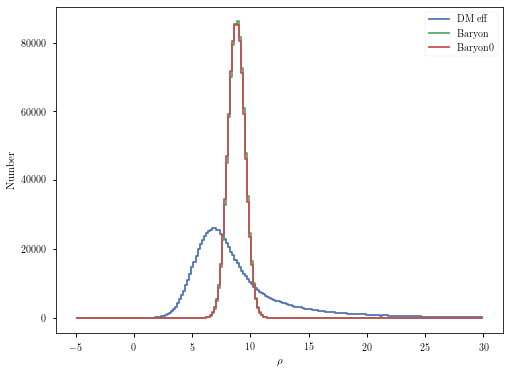

In [68]:
rho = np.linspace(-5, 30, 200)
rhoD_num, _ = np.histogram(rhoD, bins=rho)
rhob_num, _ = np.histogram(rhob, bins=rho)
rhob0_num, _ = np.histogram(rhob0, bins=rho)
rhomid = 0.5*(rho[1:] + rho[:-1])
# plot step
fig, ax = plt.subplots(figsize=(8, 6))
ax.step(rhomid, rhoD_num, label='DM eff')
ax.step(rhomid, rhob_num, label='Baryon')
ax.step(rhomid, rhob0_num, label='Baryon0')
ax.set_xlabel(r'$\rho$')
ax.set_ylabel('Number')
ax.legend()
plt.show()

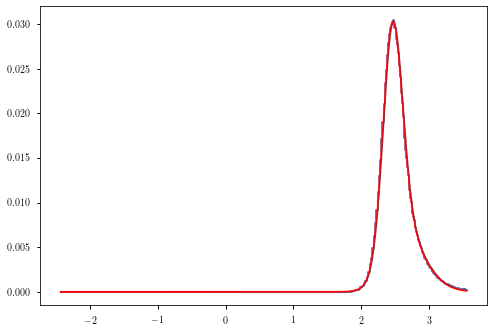

In [83]:
from scipy.optimize import curve_fit
from scipy.stats import skewnorm

def rhoD_xlog_pdf(x, *args):
    loc = args[0]
    amp1, a1, scale1 = args[1:4]
    amp2, a2, scale2 = args[4:]

    return amp1*skewnorm.pdf(x, a1, loc, scale1) + amp2*skewnorm.pdf(x, a2, loc, scale2)

def rhoD_pdf(x, *args):
    return rhoD_xlog_pdf(np.log(x+5), *args)

rhoD_fit, _ = curve_fit(rhoD_xlog_pdf, np.log(rhomid+5), rhoD_num, p0=[0, 1, 0, 0.1, 0.1, 0, 10])

plt.step(np.log(rhomid+5), rhoD_num/rhoD_num.sum())
plt.plot(np.log(rhomid+5), rhoD_xlog_pdf(np.log(rhomid+5), *rhoD_fit)/rhoD_num.sum(), 'r-')

In [87]:
from scipy.optimize import curve_fit

# def skewpdf(x, amp, a, loc, scale):
#     return amp*skewnorm.pdf(x, a, loc, scale)
# dx = rhomid[1]-rhomid[0]

# rhoD_fit, _ = curve_fit(skewpdf, rhomid, rhoD_num/(rhoD_num.sum()*dx), p0=[1, 3, 1, 0.5])
# rhoD_fit = rhoD_fit[1:]

rhoD_sample = np.random.choice(rhoD, size=1_000)
# rhoD_fit = skewnorm.fit(rhoD_sample)
rhob_sample = np.random.choice(rhob, size=10_000)
rhob_fit = skewnorm.fit(rhob_sample)
rhob0_sample = np.random.choice(rhob0, size=10_000)
rhob0_fit = norm.fit(rhob0_sample)
rhoD_fit

array([2.39891319e+00, 4.35188237e+03, 1.46153134e+00, 3.83238035e-01,
       7.26896083e+03, 6.78441827e-01, 1.57668786e-01])

((-0.4984338567429033, 9.192196862226975, 0.7483005297638272),
 (8.893931655827117, 0.7089864141386487))

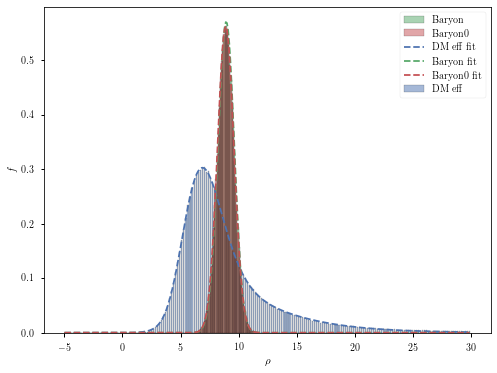

In [86]:
# plot
rho = np.arange(-5, 30, 0.1)
dx = rho[1]-rho[0]
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(rhomid, rhoD_num/(rhoD_num.sum()*dx), width=dx, label='DM eff', ec='k', alpha=0.5, color='C0')
# ax.hist(rhoD, bins=rho, density=True, label='DM eff', ec='k', alpha=0.5, color='C0')
ax.hist(rhob, bins=rho, density=True, label='Baryon', ec='k', alpha=0.5,color='C1')
ax.hist(rhob0, bins=rho, density=True, label='Baryon0', ec='k', alpha=0.5, color='C2')
# ax.plot(rho, skewpdf(rho, *rhoD_fit), label='DM eff fit', color='C0', ls='--')
# ax.plot(rho, skewnorm.pdf(rho, *rhoD_fit), label='DM eff fit', color='C0', ls='--')
ax.plot(rho, rhoD_pdf(rho, *rhoD_fit)/(rhoD_num.sum()*dx), label='DM eff fit', color='C0', ls='--')
ax.plot(rho, skewnorm.pdf(rho, *rhob_fit), label='Baryon fit', color='C1', ls='--')
ax.plot(rho, norm.pdf(rho, *rhob0_fit), label='Baryon0 fit', color='C2', ls='--')
ax.set_xlabel(r'$\rho$')
ax.set_ylabel(r'$f$')
ax.legend()
rhob_fit, rhob0_fit

rhoD = 7.41 +3.69/-3.27
rhob = 8.90 +0.70/-0.70
rhob0 = 8.88 +0.71/-0.70


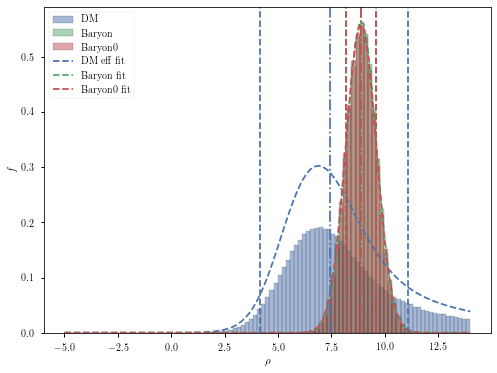

In [88]:
from utils import hdi_sample

sigma = np.array([68, 90, 95])
alpha = 1 - sigma/100

hpd, modes = hdi_sample(rhoD_sample, -5, 20, alpha=alpha[0])
rhoD_mode = modes[0]
rhoD_low, rhoD_high = hpd[0]

hpd, modes = hdi(lambda x: skewnorm.pdf(x, *rhob_fit), 5, 12.5, alpha=alpha[0])
rhob_mode = modes[0]
rhob_low, rhob_high = hpd[0]

hpd, modes = hdi(lambda x: norm.pdf(x, *rhob0_fit), 5, 12.5, alpha=alpha[0])
rhob0_mode = modes[0]
rhob0_low, rhob0_high = hpd[0]

# plot
rho = np.linspace(-5, 14, 100)
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(rhoD, bins=rho, density=True, label='DM', ec='k', alpha=0.5, color='C0')
ax.hist(rhob, bins=rho, density=True, label='Baryon', ec='k', alpha=0.5,color='C1')
ax.hist(rhob0, bins=rho, density=True, label='Baryon0', ec='k', alpha=0.5, color='C2')
ax.plot(rho, rhoD_pdf(rho, *rhoD_fit)/(rhoD_num.sum()*dx), label='DM eff fit', color='C0', ls='--')
ax.plot(rho, skewnorm.pdf(rho, *rhob_fit), label='Baryon fit', color='C1', ls='--')
ax.plot(rho, norm.pdf(rho, *rhob0_fit), label='Baryon0 fit', color='C2', ls='--')
ax.axvline(rhoD_mode, color='C0', ls='-.')
ax.axvline(rhob_mode, color='C1', ls='-.')
ax.axvline(rhob0_mode, color='C2', ls='-.')
ax.axvline(rhoD_low, color='C0', ls='--')
ax.axvline(rhoD_high, color='C0', ls='--')
ax.axvline(rhob_low, color='C1', ls='--')
ax.axvline(rhob_high, color='C1', ls='--')
ax.axvline(rhob0_low, color='C2', ls='--')
ax.axvline(rhob0_high, color='C2', ls='--')
ax.set_xlabel(r'$\rho$')
ax.set_ylabel(r'$f$')
ax.legend()
print(f'rhoD = {rhoD_mode:.02f} +{rhoD_high-rhoD_mode:.02f}/-{rhoD_mode-rhoD_low:.02f}')
print(f'rhob = {rhob_mode:.02f} +{rhob_high-rhob_mode:.02f}/-{rhob_mode-rhob_low:.02f}')
print(f'rhob0 = {rhob0_mode:.02f} +{rhob0_high-rhob0_mode:.02f}/-{rhob0_mode-rhob0_low:.02f}')

rhob0 = 8.88 +0.71/-0.70


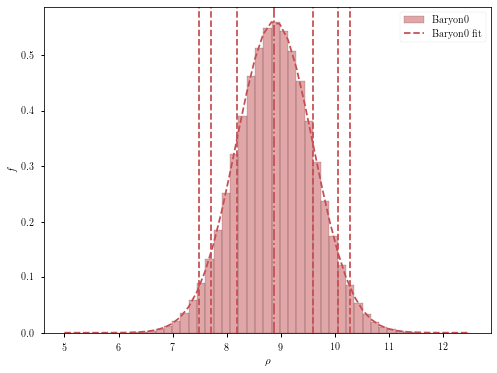

In [89]:
rhob0_low = []
rhob0_high = []
for i, alp in enumerate(alpha):
    hpd, modes = hdi(lambda x: norm.pdf(x, *rhob0_fit), low=5, high=12.5, alpha=alp)
    low, high = hpd[0]
    rhob0_low.append(low)
    rhob0_high.append(high)
# plot
rho = np.linspace(5, 12.5, 50)
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(rhob0, bins=rho, density=True, label='Baryon0', ec='k', alpha=0.5, color='C2')
ax.plot(rho, norm.pdf(rho, *rhob0_fit), label='Baryon0 fit', color='C2', ls='--')
ax.axvline(rhob0_mode, color='C2', ls='-.')
for low, high in zip(rhob0_low, rhob0_high):
    ax.axvline(low, color='C2', ls='--')
    ax.axvline(high, color='C2', ls='--')
ax.set_xlabel(r'$\rho$')
ax.set_ylabel(r'$f$')
ax.legend()
print(f'rhob0 = {rhob0_mode:.02f} +{rhob0_high[0]-rhob0_mode:.02f}/-{rhob0_mode-rhob0_low[0]:.02f}')

In [94]:
from tqdm import tqdm

rhoD_modes = []
rhoD_errs = []
rhob_modes = []
rhob_errs = []
rhoD_fits = []
rhoD_samples = []
rho = np.linspace(-5, 30, 200)
rhomid = 0.5*(rho[1:] + rho[:-1])
dx = rhomid[1]-rhomid[0]
for file in tqdm(files):
    df = np.load(file)
    rhob = df[:, :, 12:24]
    rhob = rhob.reshape(-1, 12)
    rhob = rhob.sum(axis=1)/1E-2
    rhoDM = df[:, :, 24].reshape(-1)/1E-2
    sigmaDD = df[:, :, 25].reshape(-1)
    hDD = df[:, :, 26].reshape(-1)
    rhoD = rhoDM + sigmaDD/(4*hDD)/1E-2
    rhoD_sample = np.random.choice(rhoD, size=10_000)
    rhoD_samples.append(rhoD_sample)
    rhoD_num = np.histogram(rhoD, bins=rho)[0]
    rhoD_fit, _ = curve_fit(rhoD_xlog_pdf, np.log(rhomid+5), rhoD_num, p0=[0, 1, 0, 0.1, 0.1, 0, 10])
    rhoD_fits.append(rhoD_fit)
    # plt.step(np.log(rhomid+5), rhoD_num/rhoD_num.sum())
    # plt.plot(np.log(rhomid+5), rhoD_xlog_pdf(np.log(rhomid+5), *rhoD_fit)/rhoD_num.sum(), 'r-')
    # plt.title(file)
    # plt.show()
    # continue
    # break
    # mask = rhoDM > -3
    # rhob = rhob[mask]
    # rhoDM = rhoDM[mask]
    # rhoD = rhoD[mask]
    # rhoD_num, _ = np.histogram(rhoD, bins=rho)
    # print("fitting...")
    # rhoD_fit, _ = curve_fit(skewpdf, rhomid, rhoD_num/(rhoD_num.sum()*dx), p0=[1, 5, 1, 0.5])
    # rhoD_fits.append(rhoD_fit)
    # plt.bar(rhomid, rhoD_num/(rhoD_num.sum()*dx), width=dx, label='DM eff', ec='k', alpha=0.5, color='C0')
    # plt.plot(rho, skewpdf(rho, *rhoD_fit), label='DM eff fit', color='r', ls='--')
    # plt.title(file)
    # plt.show()
    # continue
    rhob_sample = np.random.choice(rhob, size=10_000, replace=False)
    rhob_fit = skewnorm.fit(rhob_sample)
    # print("calculating HDI...")
    rhoD_err = []
    rhob_err = []
    rhoD_mode = None
    rhob_mode = None
    for i, alp in enumerate(alpha):
        hpd, modes = hdi_sample(rhoD_sample, -5, 24, alpha=alp)
        rhoD_mode = modes[0]
        low, high = hpd[0]
        rhoD_err.append({'alpha': alp, 'low': low, 'high': high})

        hpd, modes = hdi(lambda x: skewnorm.pdf(x, *rhob_fit), 5, 15, alpha=alp)
        rhob_mode = modes[0]
        low, high = hpd[0]
        rhob_err.append({'alpha': alp, 'low': low, 'high': high})
    rhoD_errs.append(rhoD_err)
    rhob_errs.append(rhob_err)
    rhoD_modes.append(rhoD_mode)
    rhob_modes.append(rhob_mode)

100%|██████████| 15/15 [00:31<00:00,  2.10s/it]


In [95]:
rhoD_fits

[array([ 2.05868972e+00,  1.86044907e+04, -9.73155398e-01,  1.59621814e-01,
         2.46951258e+03, -4.52463862e-01,  1.00636205e-01]),
 array([ 1.94974602e+00,  7.48707642e+03, -7.00352321e-02,  2.19230777e-01,
         1.39653080e+04,  3.61937545e-02,  1.36785571e-01]),
 array([2.19872630e+00, 3.27883203e+03, 4.89485218e+00, 3.03165202e-01,
        1.21704468e+04, 2.16660025e-01, 1.38196559e-01]),
 array([ 2.45835616e+00,  3.22608437e+03,  1.83748578e-01,  9.44407893e-02,
         9.80097801e+03, -1.63616264e-01,  1.32509501e-01]),
 array([2.49793009e+00, 9.87708896e+03, 2.08188823e-01, 1.31534425e-01,
        2.13405548e+03, 5.74569056e-01, 2.42809087e-01]),
 array([2.39891319e+00, 4.35188237e+03, 1.46153134e+00, 3.83238035e-01,
        7.26896083e+03, 6.78441827e-01, 1.57668786e-01]),
 array([2.25678612e+00, 7.47618091e+03, 4.62242898e-01, 1.83359524e-01,
        4.45550789e+03, 6.12716727e+00, 5.28903791e-01]),
 array([2.19366651e+00, 6.26041433e+03, 2.47507032e+00, 6.23786892e-0

array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
       1.64907838e-101, 1.59736483e-101, 1.54727432e-101])

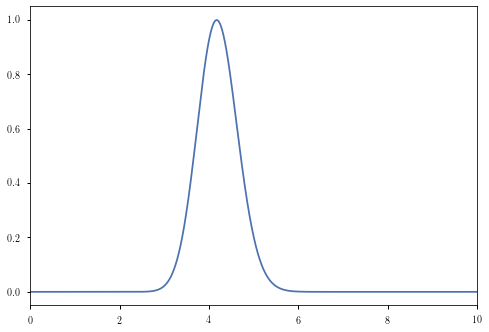

In [98]:
# multiplying the rhoDM, but it became addition in log
rho = np.linspace(-5, 30, 10000)
log_rhoD = None
for p in rhoD_fits:
    if log_rhoD is None:
        log_rhoD = np.log(rhoD_pdf(rho, *p))
    else:
        log_rhoD += np.log(rhoD_pdf(rho, *p))
    # print(log_rhoD.sum())
# turn into rhoDM
rhoD_com = np.exp(log_rhoD)
# normalize with max value
rhoD_com /= rhoD_com.max()
# plot
fig, ax = plt.subplots()
ax.plot(rho, rhoD_com, label='rhoD')
ax.set_xlim(0,10)
rhoD_com

In [99]:
def skewpdf(x, *args):
    A, other = args[0], args[1:]
    return A*skewnorm.pdf(x, *other)

rhoD_com_fit, _ = curve_fit(skewpdf, rho, rhoD_com, p0=[1, 1.0, 2.0, 1])
rhoD_com_fit

array([1.12097221, 0.93976816, 3.906025  , 0.53736187])

(0.0, 7.0)

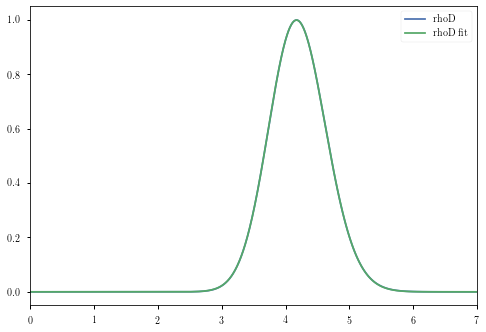

In [101]:
plt.plot(rho, rhoD_com, label='rhoD')
plt.plot(rho, skewpdf(rho, *rhoD_com_fit), label='rhoD fit')
plt.legend()
plt.xlim(0,7)

In [102]:
rhoD_com_err = []
rhoD_com_mode = None
for i, alp in enumerate(alpha):
    hpd, modes = hdi(lambda x: skewpdf(x, *rhoD_com_fit), low=-1, high=5, alpha=alp)
    low, high = hpd[0]
    rhoD_com_err.append({'sigma':sigma, 'low': low, 'high': high})
    rhoD_com_mode = modes[0]
rhoD_com_mode, rhoD_com_err

(4.17,
 [{'sigma': array([68, 90, 95]), 'low': 3.76, 'high': 4.6},
  {'sigma': array([68, 90, 95]), 'low': 3.53, 'high': 4.86},
  {'sigma': array([68, 90, 95]), 'low': 3.44, 'high': 4.96}])

In [103]:
print(f"{rhoD_com_mode} + {rhoD_com_err[0]['high']-rhoD_com_mode} - {rhoD_com_mode-rhoD_com_err[0]['low']}")

4.17 + 0.4299999999999997 - 0.41000000000000014


In [26]:
A9 = sp[sp['SpT'] == 'A9V']['J-K'].values[0]
F0 = sp[sp['SpT'] == 'F0V']['J-K'].values[0]
b1 = (A9+F0)/2

F9 = sp[sp['SpT'] == 'F9V']['J-K'].values[0]
G0 = sp[sp['SpT'] == 'G0V']['J-K'].values[0]
b2 = (F9+G0)/2
b1, b2

(0.1355, 0.314)

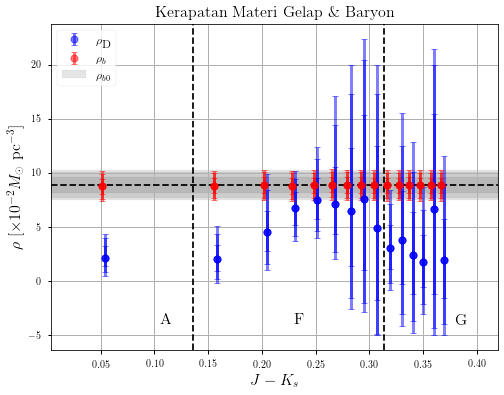

In [27]:
cs = np.linspace(c.min()-0.05, c.max()+0.05, 100)

fig, ax = plt.subplots(figsize=(8, 6))
ax.axhline(y=rhob0_mode, color='black', linestyle='--')
for i in range(3):
    low = np.array([err[i]['low'] for err in rhoD_errs])
    high = np.array([err[i]['high'] for err in rhoD_errs])
    dm_ax = ax.errorbar(c, rhoD_modes, yerr=[rhoD_modes-low, high-rhoD_modes], fmt='o', color='blue', capsize=3, alpha=0.5, elinewidth=3, markeredgewidth=1)
    low = np.array([err[i]['low'] for err in rhob_errs])
    high = np.array([err[i]['high'] for err in rhob_errs])
    rhob_ax = ax.errorbar(c-0.003, rhob_modes, yerr=[rhob_modes-low, high-rhob_modes], fmt='o', color='red', capsize=3, alpha=0.5, elinewidth=3, markeredgewidth=1)
    rhob0_ax = ax.fill_between(cs, rhob0_low[i], rhob0_high[i], color='black', alpha=0.1)
    # rhoD_com_ax = ax.fill_between(cs, rhoD_com_err[i]['low'], rhoD_com_err[i]['high'], color='C0', alpha=0.1)
    if i == 2:
        # ax.legend([dm_ax, rhob_ax, rhob0_ax, rhoD_com_ax], 
        #           [r'$\rho_{\textup{D}}$', r'$\rho_{b}$', r'$\rho_{b0}$', r'$\rho_{\textup{com}}$'],
        #           loc='best', fontsize=12)
        ax.legend([dm_ax, rhob_ax, rhob0_ax], 
                  [r'$\rho_{\textup{D}}$', r'$\rho_{b}$', r'$\rho_{b0}$'],
                  loc='best', fontsize=12)
# real value
# ax.axhline(y=rhoD_com_mode, color='black', linestyle='--')

ax.axvline(x=b1, color='black', linestyle='--')
ax.axvline(x=b2, color='black', linestyle='--')
ax.text(0.105, -4, r'$\textup{A}$', fontsize=16)
ax.text(0.23, -4, r'$\textup{F}$', fontsize=16)
ax.text(0.38, -4, r'$\textup{G}$', fontsize=16)
ax.set_xlabel(r'$J-K_s$', fontsize=16)
ax.set_ylabel(r'$\rho$ [$\times 10^{-2}M_{\odot}\ $pc$^{-3}$]', fontsize=16)
ax.set_xlim(cs.min(), cs.max())
ax.set_title("Kerapatan Materi Gelap \& Baryon", fontsize=16)
ax.grid()
fig.savefig(join('img', 'rhoD-dddm.pdf'), dpi=300)
plt.show()
# rhoD_com_mode

In [28]:
for i in range(len(c)):
    low1 = np.array([err[0]['low'] for err in rhoD_errs])
    high1 = np.array([err[0]['high'] for err in rhoD_errs])
    low2 = np.array([err[1]['low'] for err in rhoD_errs])
    high2 = np.array([err[1]['high'] for err in rhoD_errs])
    low3 = np.array([err[2]['low'] for err in rhoD_errs])
    high3 = np.array([err[2]['high'] for err in rhoD_errs])
    print(f"$[{c1[i]:.03f}, {c2[i]:.03f}]$ & {rhoD_modes[i]:.02f} & $[{low1[i]:.02f}, {high1[i]:.02f}]$ & $[{low2[i]:.02f}, {high2[i]:.02f}]$ & $[{low3[i]:.02f}, {high3[i]:.02f}]$ \\\\")

$[-0.019, 0.127]$ & 2.20 & $[1.37, 3.28]$ & $[0.82, 4.01]$ & $[0.51, 4.34]$ \\
$[0.127, 0.190]$ & 2.08 & $[0.95, 3.33]$ & $[0.19, 4.39]$ & $[-0.17, 5.13]$ \\
$[0.190, 0.220]$ & 4.52 & $[2.79, 6.50]$ & $[1.63, 8.43]$ & $[1.08, 9.93]$ \\
$[0.220, 0.242]$ & 6.75 & $[5.24, 8.27]$ & $[4.23, 9.43]$ & $[3.73, 10.17]$ \\
$[0.242, 0.260]$ & 7.53 & $[5.75, 9.51]$ & $[4.65, 11.31]$ & $[4.02, 12.39]$ \\
$[0.260, 0.276]$ & 7.11 & $[4.33, 10.55]$ & $[2.67, 14.48]$ & $[2.04, 17.14]$ \\
$[0.276, 0.289]$ & 6.52 & $[1.43, 12.35]$ & $[-1.50, 17.34]$ & $[-2.53, 19.97]$ \\
$[0.289, 0.301]$ & 7.64 & $[1.08, 15.35]$ & $[-1.98, 20.47]$ & $[-2.87, 22.39]$ \\
$[0.301, 0.313]$ & 4.97 & $[-1.72, 12.48]$ & $[-4.91, 17.27]$ & $[-5.00, 20.00]$ \\
$[0.313, 0.325]$ & 3.11 & $[1.18, 5.23]$ & $[-0.11, 7.10]$ & $[-0.84, 8.43]$ \\
$[0.325, 0.335]$ & 3.82 & $[-0.27, 8.32]$ & $[-3.03, 12.51]$ & $[-4.16, 15.54]$ \\
$[0.335, 0.345]$ & 2.47 & $[-1.17, 6.42]$ & $[-3.69, 10.06]$ & $[-4.81, 12.90]$ \\
$[0.345, 0.355]$ & 1.77 & $[

# $\Sigma$

In [29]:
import sys
from os.path import join, abspath
from glob import glob
import numpy as np
import vaex
from tqdm import tqdm
import matplotlib.pyplot as plt
from time import time
from scipy.optimize import curve_fit
from scipy.stats import norm, skewnorm

In [30]:
# import utils
root_dir = abspath(join('..'))
root_dir

'/home2/s20321005/Thesis-Project'

In [31]:
if root_dir not in sys.path:
    sys.path.append(root_dir)
sys.path

['/home2/s20321005/Thesis-Project/6_Analisis',
 '/home2/s20321005/.conda/envs/vaex/lib/python38.zip',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/lib-dynload',
 '',
 '/home2/s20321005/.local/lib/python3.8/site-packages',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/site-packages',
 '/home2/s20321005/Thesis-Project']

In [32]:
from utils import style, hdi, load_spectral_types

In [33]:
sp = load_spectral_types()
sp

,SpT,M_J,J-H,H-Ks,J-K
0,O9V,-3.44,-0.164,-0.071,-0.235
1,O9.5V,-3.30,-0.161,-0.069,-0.230
2,B0V,-3.17,-0.159,-0.067,-0.226
3,B0.5V,-2.80,-0.153,-0.063,-0.216
4,B1V,-2.33,-0.148,-0.059,-0.207
...,...,...,...,...,...
95,T6V,15.34,0.100,-0.030,0.070
96,T7V,15.83,0.000,0.000,0.000
97,T7.5V,16.61,0.200,-0.050,0.150
98,T8V,17.30,0.200,-0.050,0.150


In [34]:
style(name="seaborn-notebook")

In [35]:
root_data_dir = abspath(join(root_dir, "Data"))
root_data_dir

'/home2/s20321005/Thesis-Project/Data'

In [36]:
data_baryon_dir = join(root_data_dir, "Baryon")
# load baryons components
df_baryon = vaex.open(join(data_baryon_dir, "baryon.hdf5"))
rhos = df_baryon["rho"].to_numpy()  # Msun/pc^3
sigmaz = df_baryon["sigma_z"].to_numpy() # km/s

e_rhos = df_baryon["e_rho"].to_numpy()  # Msun/pc^3
e_sigmaz = df_baryon["e_sigma_z"].to_numpy() # km/s
dpi=100

In [37]:
boundaries = np.load(join(root_data_dir, "boundaries.npy"))
boundaries

array([[-0.019     ,  0.12713703],
       [ 0.12713703,  0.19024014],
       [ 0.19024014,  0.22021412],
       [ 0.22021412,  0.24230021],
       [ 0.24230021,  0.26004796],
       [ 0.26004796,  0.27621813],
       [ 0.27621813,  0.28923315],
       [ 0.28923315,  0.30106498],
       [ 0.30106498,  0.31329121],
       [ 0.31329121,  0.32512304],
       [ 0.32512304,  0.3353773 ],
       [ 0.3353773 ,  0.34523716],
       [ 0.34523716,  0.35509702],
       [ 0.35509702,  0.36535128],
       [ 0.36535128,  0.37402796]])

In [38]:
c1 = boundaries[:, 0]
c2 = boundaries[:, 1]
c = (c1 + c2) / 2
c

array([0.05406852, 0.15868859, 0.20522713, 0.23125717, 0.25117408,
       0.26813305, 0.28272564, 0.29514907, 0.3071781 , 0.31920713,
       0.33025017, 0.34030723, 0.35016709, 0.36022415, 0.36968962])

In [39]:
mcmc_dir = join(root_data_dir, "MCMC-no", "dddm", "data")
mcmc_dir

'/home2/s20321005/Thesis-Project/Data/MCMC-no/dddm/data'

In [40]:
index = 0
df = np.load(files[index])
df.shape

(2500, 350, 35)

In [41]:
files = glob(join(mcmc_dir, "chain-*"))
files.sort()
files

['/home2/s20321005/Thesis-Project/Data/MCMC-no/dddm/data/chain-(-0.019)_(0.127).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dddm/data/chain-(0.127)_(0.190).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dddm/data/chain-(0.190)_(0.220).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dddm/data/chain-(0.220)_(0.242).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dddm/data/chain-(0.242)_(0.260).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dddm/data/chain-(0.260)_(0.276).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dddm/data/chain-(0.276)_(0.289).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dddm/data/chain-(0.289)_(0.301).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dddm/data/chain-(0.301)_(0.313).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dddm/data/chain-(0.313)_(0.325).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dddm/data/chain-(0.325)_(0.335).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dddm/data/chain-(

In [42]:
index = 5
df = np.load(files[index])
df.shape

(2500, 350, 35)

In [43]:
from scipy.stats import gaussian_kde

# estimate the density of (sigmaDD, hDD)
sigmaDD = df[:, :, 25].reshape(-1)
hDD = df[:, :, 26].reshape(-1)
mask = np.random.choice(np.arange(len(sigmaDD)), size=10_000)
sigmaDD = sigmaDD[mask]
hDD = hDD[mask]
xy = np.vstack([sigmaDD, hDD])
x = np.linspace(0, 30, 99)
dx = x[1] - x[0]    
y = np.linspace(0, 150, 100)
dy = y[1] - y[0]
X, Y = np.meshgrid(x, y)
Z = gaussian_kde(xy)(np.vstack([X.ravel(), Y.ravel()])).reshape(X.shape)

In [44]:
from tqdm import tqdm

vol = Z.sum()*dx*dy

z = np.linspace(Z.max(), Z.min(), 100)
for z_i in tqdm(z):
    mask = Z >= z_i
    vol_i = Z[mask].sum()*dx*dy
    if vol_i > 0.99*vol:
        break
mask

 82%|████████▏ | 82/100 [00:00<00:00, 36752.82it/s]


array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False,  True, ...,  True,  True, False],
       [False, False, False, ...,  True, False, False],
       [False, False, False, ..., False, False, False]])

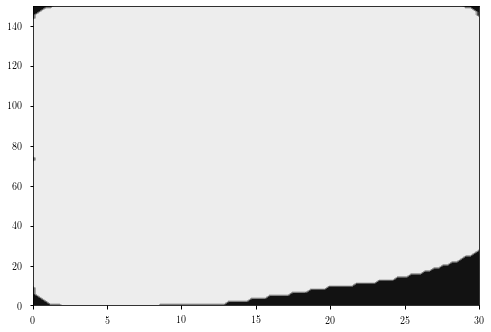

In [45]:
V = Z.copy()
V[~mask] = 0
V[mask] = 1

plt.contourf(X, Y, V, cmap='gray')

In [46]:
y_coords = np.empty_like(x)
for i in range(len(x)):
    y_v = V[:,i]
    mask = y_v < 1.0
    y_coords[i] = y[mask.sum()]

y_coords


array([21.21212121, 10.60606061,  7.57575758,  4.54545455,  3.03030303,
        1.51515152,  1.51515152,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.51515152,  1.51515152,
        1.51515152,  1.51515152,  1.51515152,  1.51515152,  1.51515152,
        1.51515152,  1.51515152,  1.51515152,  1.51515152,  1.51515152,
        1.51515152,  1.51515152,  1.51515152,  3.03030303,  3.03030303,
        3.03030303,  3.03030303,  3.03030303,  4.54545455,  4.54545455,
        4.54545455,  4.54545455,  6.06060606,  6.06060606,  6.06060606,
        6.06060606,  6.06060606,  7.57575758,  7.57575758,  7.57575758,
        7.57575758,  9.09090909,  9.09090909,  9.09090909,  9.09090909,
       10.60606061, 10.60606061, 10.60606061, 10.60606061, 10.60

Text(0, 0.5, '$\\sigma_{\\rm DD}$')

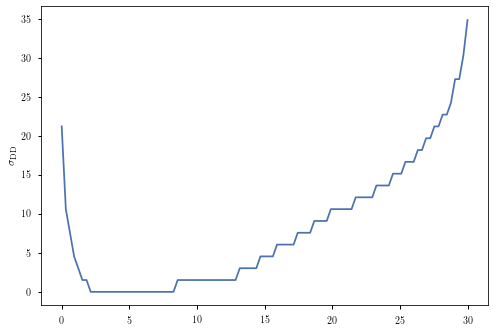

In [47]:
plt.plot(x, y_coords)
plt.ylabel(r"$\sigma_{\rm DD}$")

(0.0, 150.0)

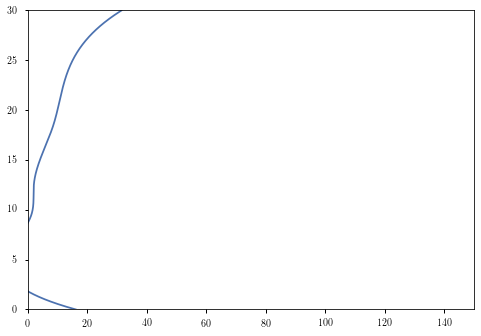

In [48]:
# smooth the y_coords curve using smoothing spline
import numpy as np
from scipy.interpolate import splrep, BSpline

mask = y_coords > 0
x_c = x[mask]
y_c = y_coords[mask]

tck = splrep(x_c, y_c, s=len(x_c))

xnew = np.linspace(x_c.min(), x_c.max(), 1000)
ynew = BSpline(*tck)(xnew)

plt.plot(ynew, xnew , label='smoothed')
plt.ylim(x.min(), x.max())
plt.xlim(y.min(), y.max())

# auto

100%|██████████| 3/3 [00:07<00:00,  2.44s/it]


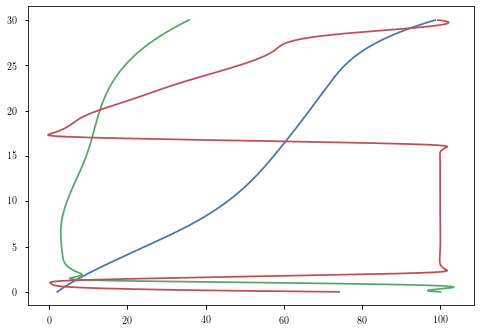

In [49]:
from tqdm import tqdm

for index in tqdm(range(len(c))[::5]):
    df = np.load(files[index])
    sigmaDD = df[:, :, 25].reshape(-1)
    hDD = df[:, :, 26].reshape(-1)
    mask = np.random.choice(np.arange(len(sigmaDD)), size=10_000)
    sigmaDD = sigmaDD[mask]
    hDD = hDD[mask]
    xy = np.vstack([sigmaDD, hDD])
    x = np.linspace(0, 30, 99)
    dx = x[1] - x[0]    
    y = np.linspace(0, 100, 100)
    dy = y[1] - y[0]
    X, Y = np.meshgrid(x, y)
    Z = gaussian_kde(xy)(np.vstack([X.ravel(), Y.ravel()])).reshape(X.shape)
    z = np.linspace(Z.max(), Z.min(), 100)
    vol = Z.sum()*dx*dy
    for z_i in z:
        mask = Z >= z_i
        vol_i = Z[mask].sum()*dx*dy
        if vol_i > 0.95*vol:
            break
    V = Z.copy()
    V[~mask] = 0
    V[mask] = 1
    y_coords = np.empty_like(x)
    for i in range(len(x)):
        y_v = V[:,i]
        mask = y_v < 1.0
        y_coords[i] = y[mask.sum()-1]
    # plt.plot(x, y_coords, label=f"${c1[index]:.03f} < J-K_s < {c2[index]:.03f}$")
    # break
    mask = y_coords > 0
    x_c = x[mask]
    y_c = y_coords[mask]

    tck = splrep(x_c, y_c, s=len(x_c))

    xnew = np.linspace(x_c.min(), x_c.max(), 1000)
    ynew = BSpline(*tck)(xnew)
    plt.plot(ynew, xnew , label=f"${c1[index]:.03f} < J-K_s < {c2[index]:.03f}$")

# plt.ylim(x.min(), x.max())
# plt.xlim(y.min(), y.max())
# plt.ylabel(r"$\sigma_{\rm DD}$ [$M_{\odot}$ pc$^{-2}]")
# plt.xlabel(r"$h_{\rm DD}$ [pc]")
# plt.legend()
# plt.show()